# 5. Monthly Anomalies
## Objective: Detect unusual trends in specific months due to climate events (e.g., El Niño).
### Method:
Calculate monthly anomalies by comparing current levels with long-term averages.
Highlight significant deviations in key months (e.g., monsoon season).
### Insights:
Detect how El Niño years deviate from non-El Niño years in terms of groundwater recharge.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = "chennai-ground-water-levels-2023.csv"  # Replace with your file path
df = pd.read_csv(file_path)
df

S.No. Area No.  Dept No.          Location         Jan         Feb  \
0      1.0        I       1.0       Kathivakkam         1.48   1.520000   
1      2.0        I       2.0       Kathivakkam         3.26   3.293000   
2      3.0        I       3.0          Ernavoor         2.01   2.236000   
3      4.0        I       4.0    Sadaiyankuppam         3.67   3.745000   
4      5.0        I       5.0   Kamadhenu Nagar         3.45   3.492000   
..     ...      ...       ...               ...          ...        ...   
227  200.0       XV     200.0       Semmenchery         3.17   3.380000   
228    NaN       XV       NaN         Sub Total        30.33  34.454000   
229    NaN       XV       NaN           Average         3.37   3.828222   
230    NaN      NaN       NaN             Total   61.8067132  67.120093   
231    NaN      NaN       NaN  Over all Average  4.120447547   4.474673   

           Mar       Apr         May        Jun        Jul          Aug  \
0     1.462000   1.500000   1.530000   1.554000   1.688000        1.599   
1     3.310000   3.360000   3.360000   3.382000   3.416000        3.459   
2     2.244000   2.240000   2.140000   2.166000   2.231000         2.51   
3     3.661000   3.660000   3.650000   3.638000   3.808000         4.01   
4     3.439000   3.310000   3.410000   3.151000   3.499000         3.28   
..         ...        ...        ...        ...        ...          ...   
227   3.722000   4.050000   5.180000   4.907000   5.827000        5.078   
228  35.048000  38.540000  41.630000  35.609000  38.016000       34.559   
229   3.894222   4.282222   4.625556   3.956556   4.224000  3.839888889   
230  68.835902  76.545540  81.858825  76.934578  83.898124        74.45   
231   4.589060   5.103036   5.457255   5.128972   5.593208  4.963333333   

           Sep          Oct          Nov          Dec  
0     1.610000         1.53         1.29         1.38  
1     3.470000         3.48         3.35        3.268  
2     2.264000         2.24         1.82         1.91  
3     3.646000         3.67         3.27        3.125  
4     3.393000          3.2         3.07        3.157  
..         ...          ...          ...          ...  
227   2.960000        5.052         2.55         1.66  
228  31.402000       32.214        23.55        16.78  
229   3.489111  3.579333333  2.616666667  2.397142857  
230  67.607943  70.58313813  46.50346831  43.70953687  
231   4.507196  4.705542542  3.100231221  2.913969124  

[232 rows x 16 columns]

In [8]:
# Columns for monthly groundwater levels
months = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_filtered = df[["Location"] + months]

In [9]:
# Convert monthly values to numeric (handling errors if any)
df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')

C:\Users\rumma\AppData\Local\Temp\ipykernel_16396\1142407886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')


In [10]:
# Calculate yearly average groundwater levels for each location
df_filtered["Yearly Average"] = df_filtered[months].mean(axis=1)

C:\Users\rumma\AppData\Local\Temp\ipykernel_16396\965981236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Yearly Average"] = df_filtered[months].mean(axis=1)


In [11]:
# Identify trends (Increasing, Decreasing, Stable)
df_filtered["Trend"] = df_filtered[months].apply(lambda x: "Increasing" if x.iloc[-1] > x.iloc[0] else "Declining" if x.iloc[-1] < x.iloc[0] else "Stable", axis=1)

C:\Users\rumma\AppData\Local\Temp\ipykernel_16396\2725930651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Trend"] = df_filtered[months].apply(lambda x: "Increasing" if x.iloc[-1] > x.iloc[0] else "Declining" if x.iloc[-1] < x.iloc[0] else "Stable", axis=1)


In [12]:
# Display the results
print("\nGroundwater Level Trends by Ward:")
print(df_filtered[["Location", "Yearly Average", "Trend"]])


Groundwater Level Trends by Ward:
             Location  Yearly Average       Trend
0         Kathivakkam        1.511917   Declining
1         Kathivakkam        3.367333  Increasing
2            Ernavoor        2.167583   Declining
3      Sadaiyankuppam        3.629417   Declining
4     Kamadhenu Nagar        3.320917   Declining
..                ...             ...         ...
227       Semmenchery        3.961333   Declining
228         Sub Total       32.677667   Declining
229           Average        3.675243   Declining
230             Total       68.321155   Declining
231  Over all Average        4.554744   Declining

[232 rows x 3 columns]


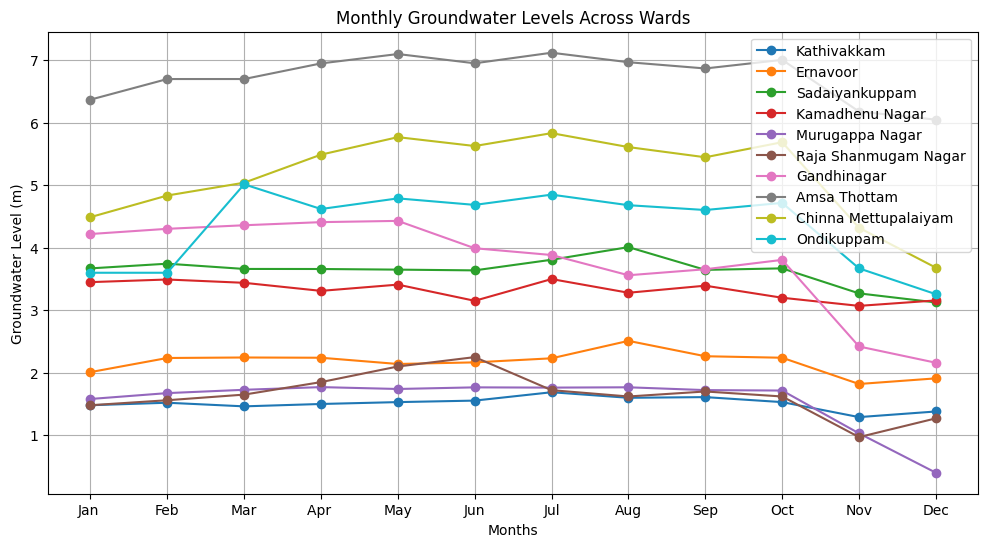

In [14]:
# Plot groundwater trends for key locations
plt.figure(figsize=(12, 6))
for location in df_filtered["Location"].unique()[:5]:  # Plot first 5 locations for readability
    subset = df_filtered[df_filtered["Location"] == location]
    plt.plot(months, subset.iloc[0, 1:13].values, marker='o', label=location)

plt.xlabel("Months")
plt.ylabel("Groundwater Level (m)")
plt.title("Monthly Groundwater Levels Across Wards")
plt.legend()
plt.grid()
plt.show()

In [17]:
# Split the locations into groups of 6 per plot
locations = df_filtered["Location"].unique()
num_plots = int(np.ceil(len(locations) / 6))  # Calculate number of plots needed

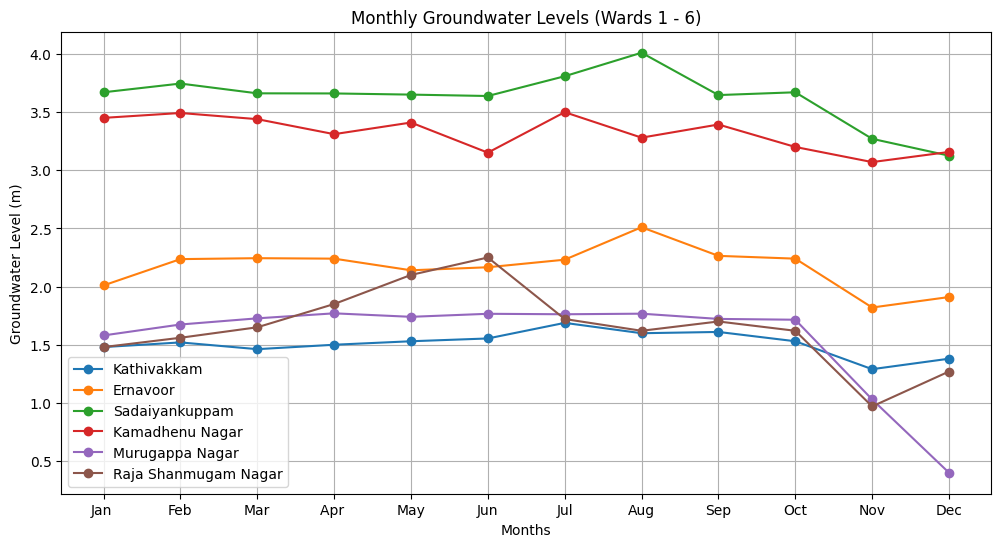

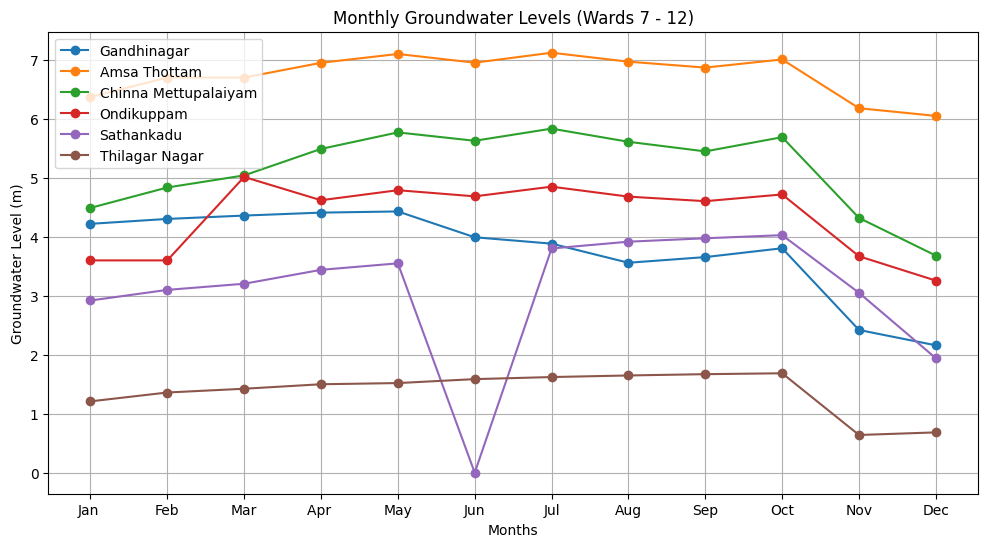

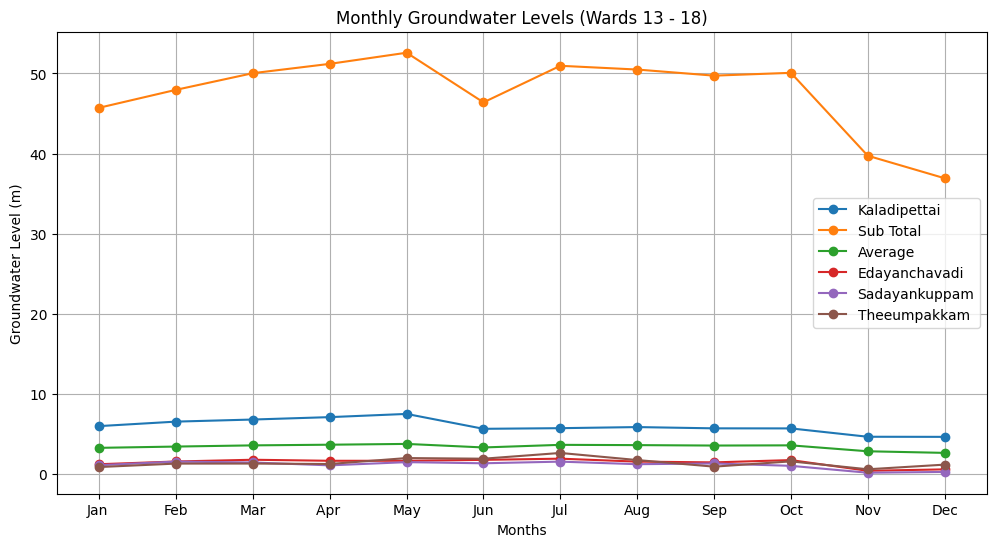

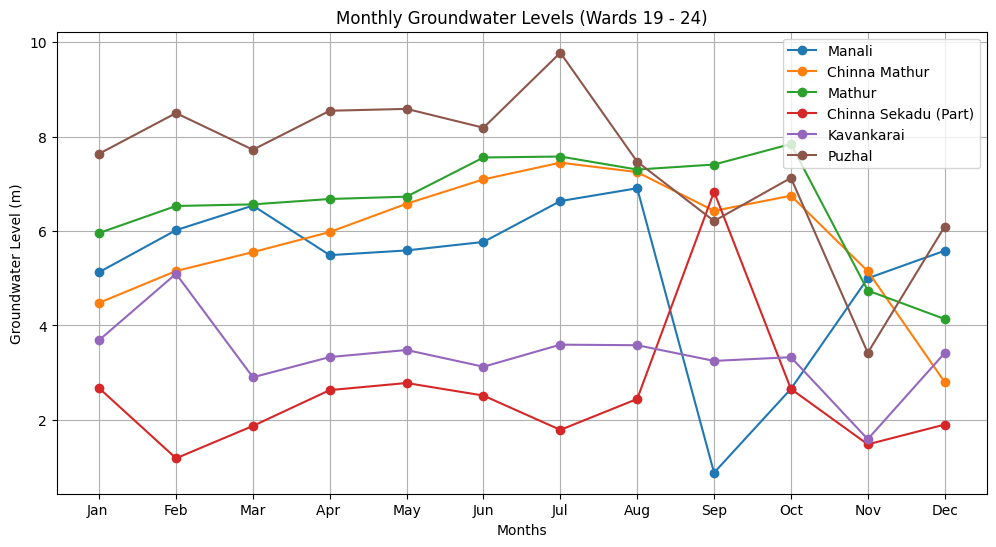

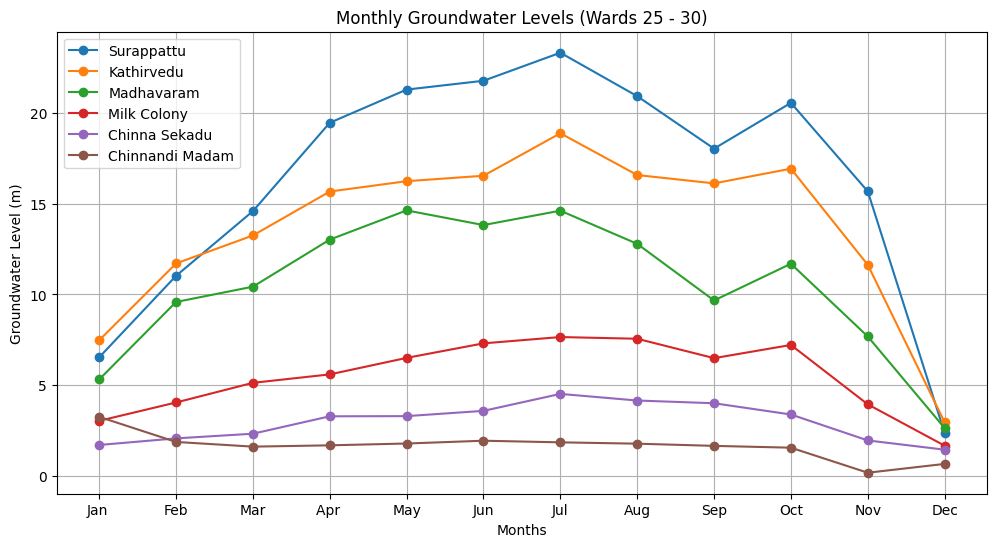

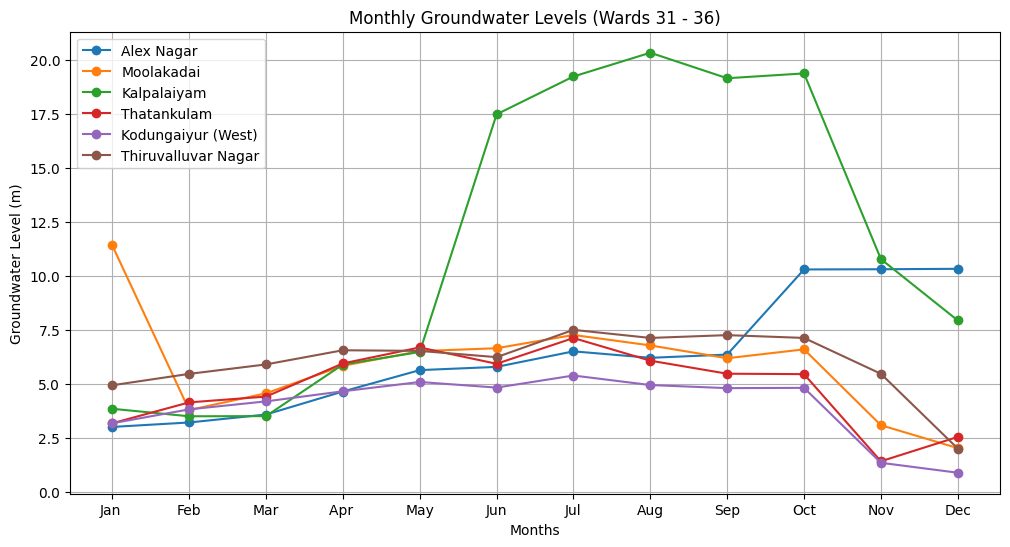

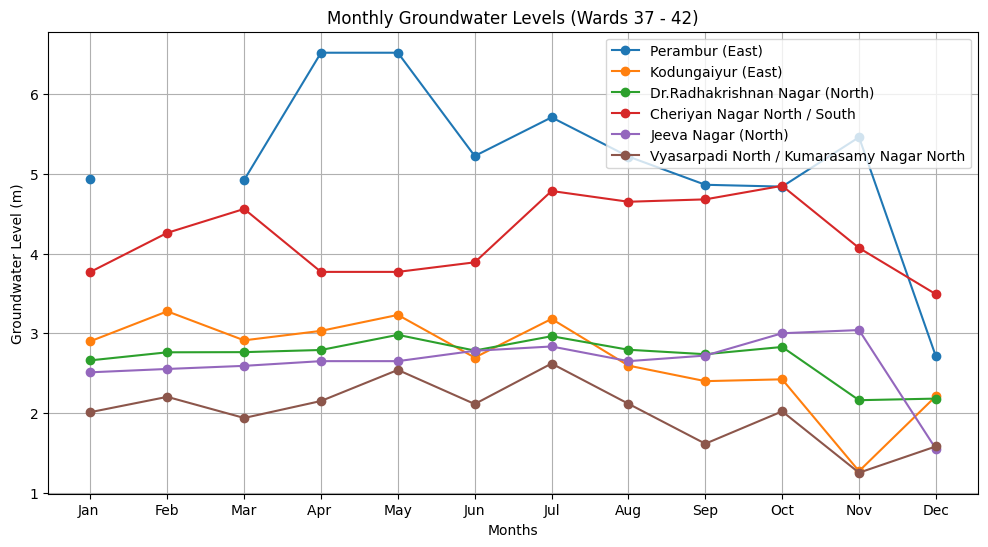

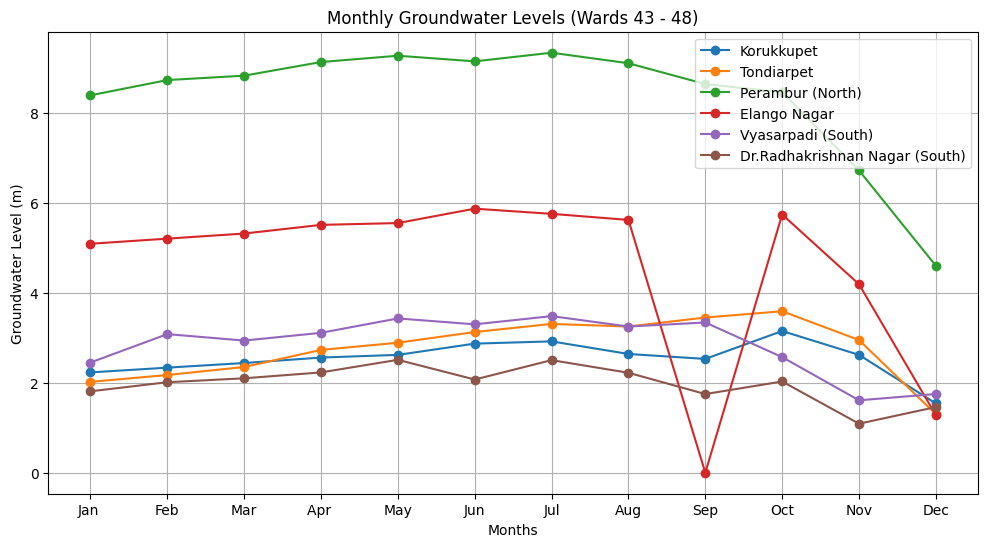

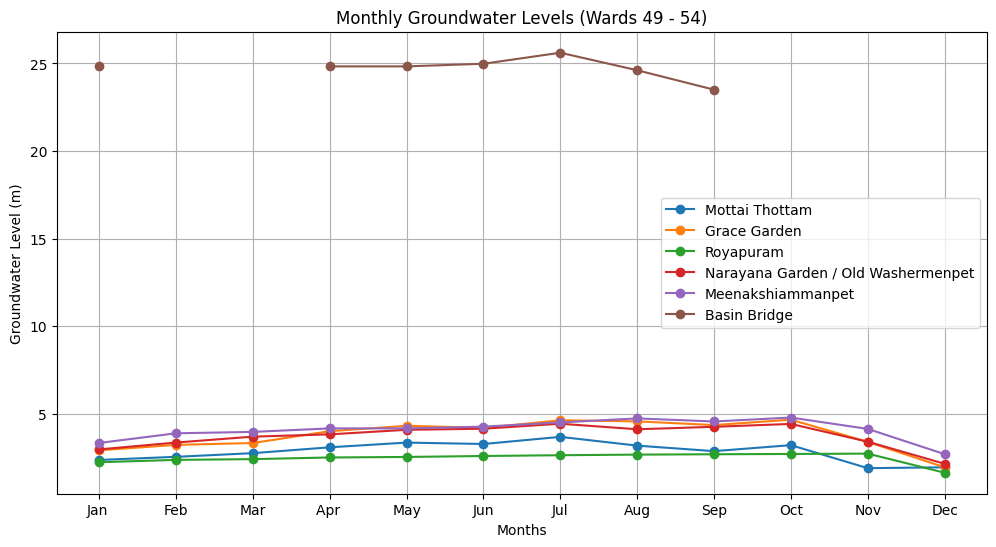

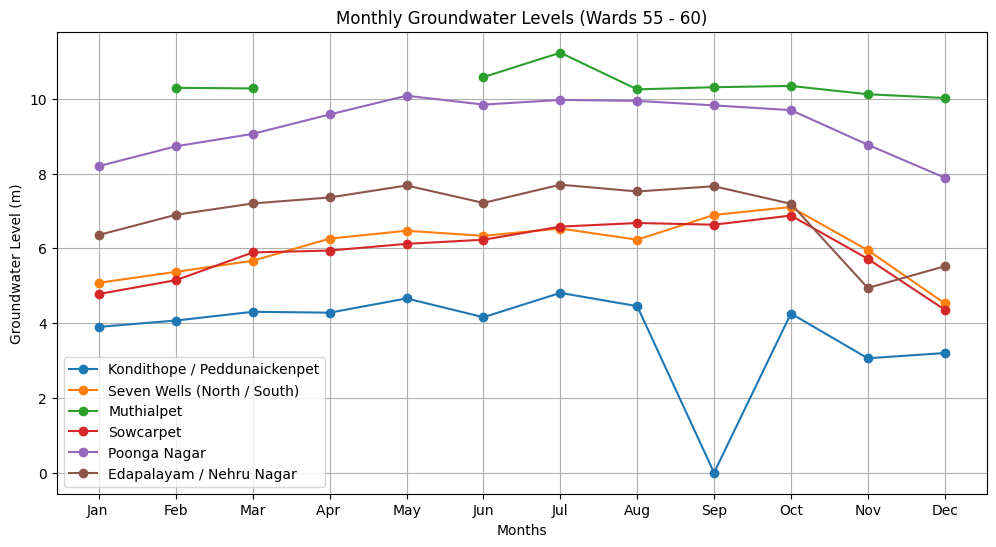

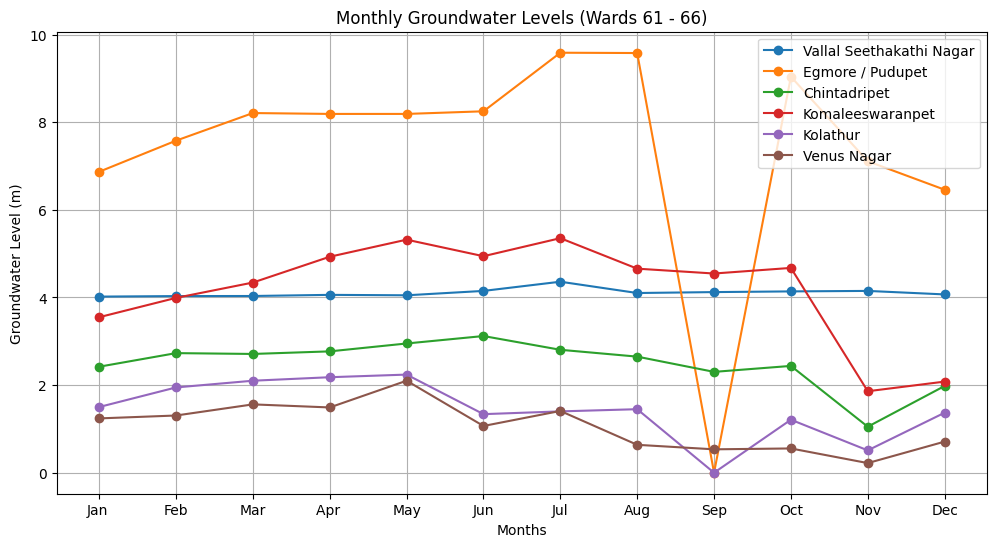

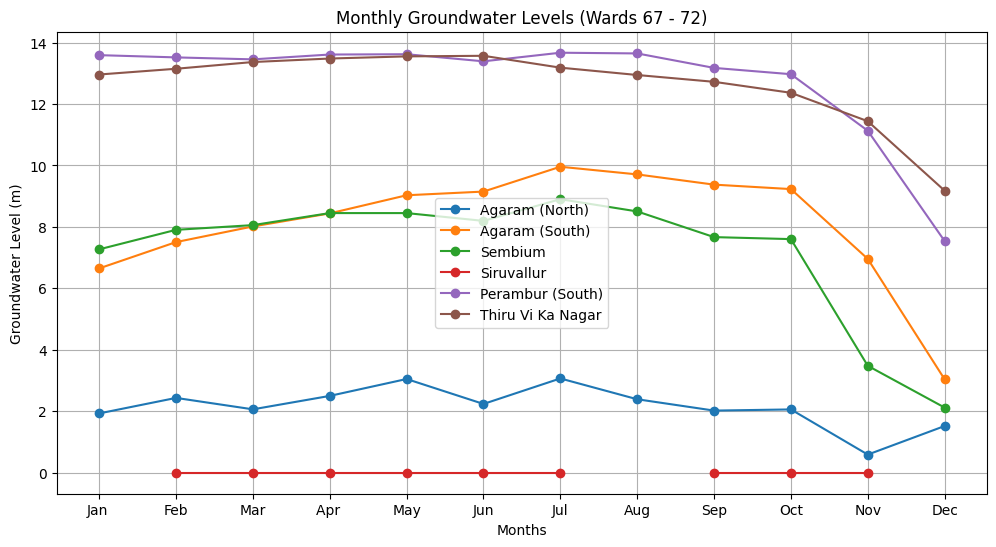

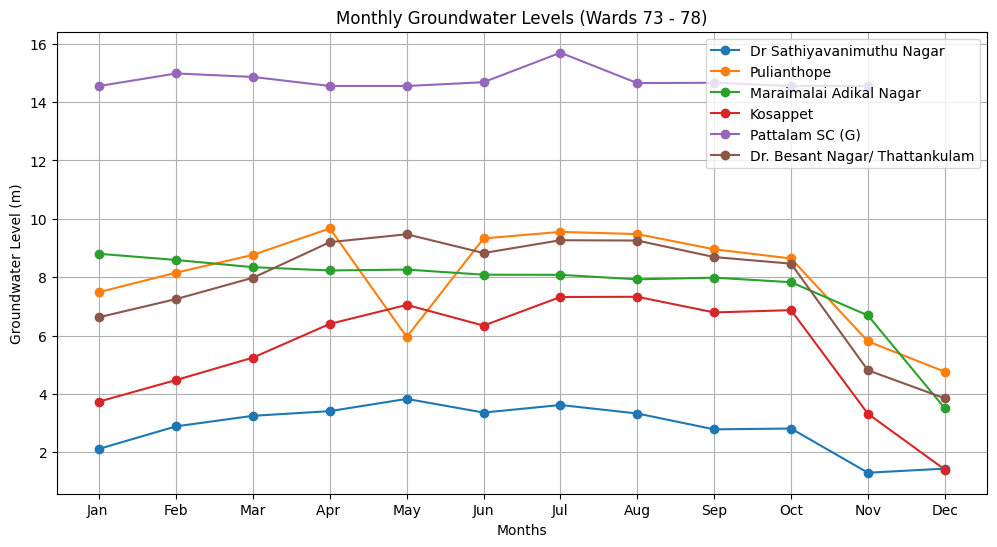

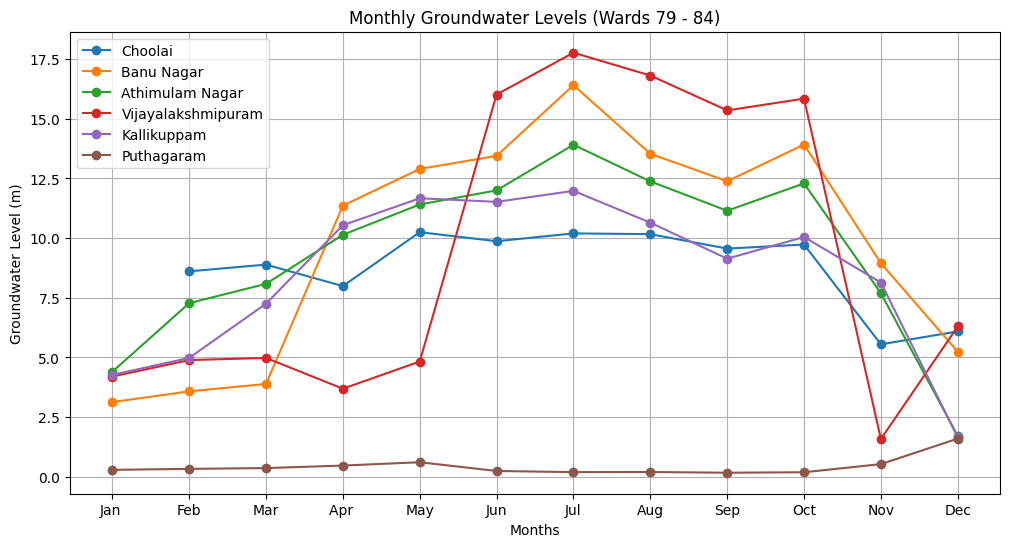

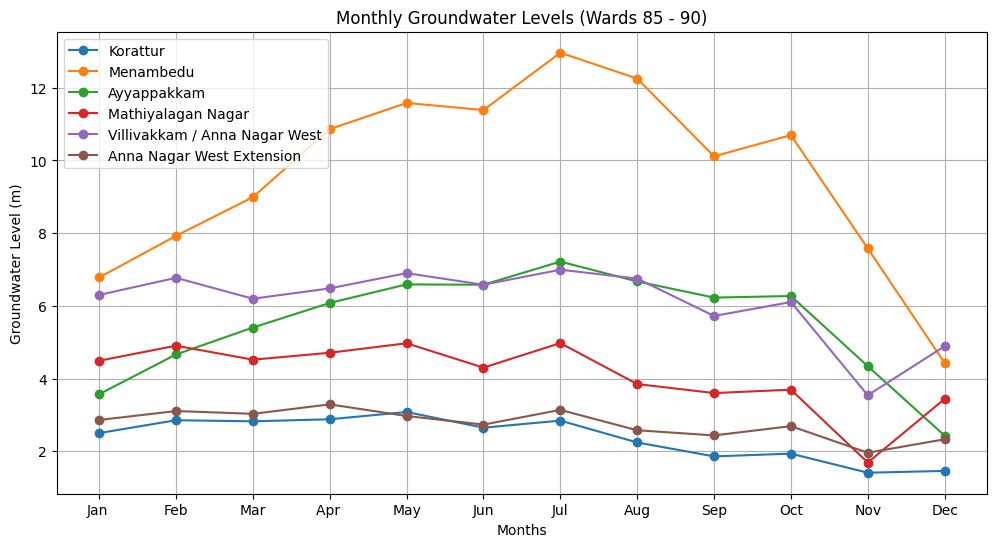

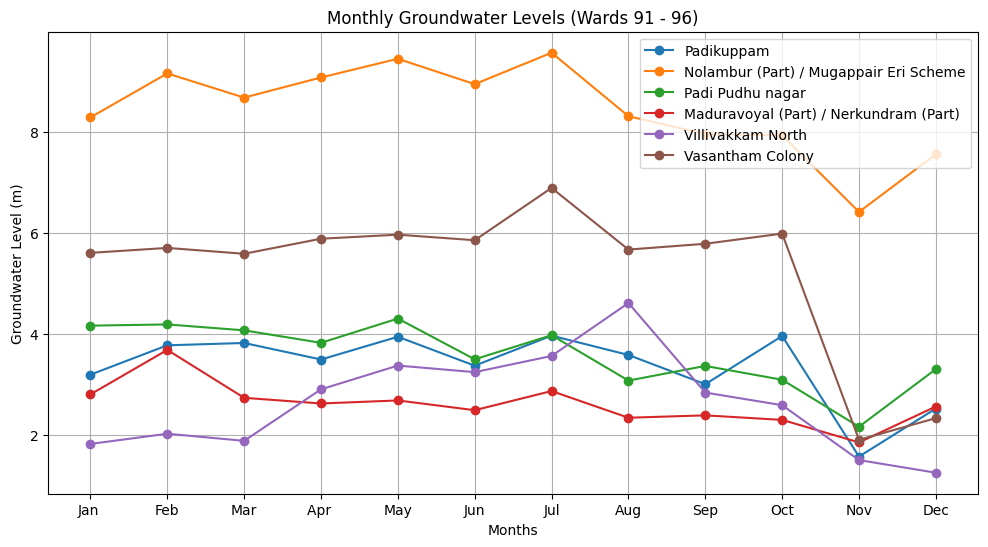

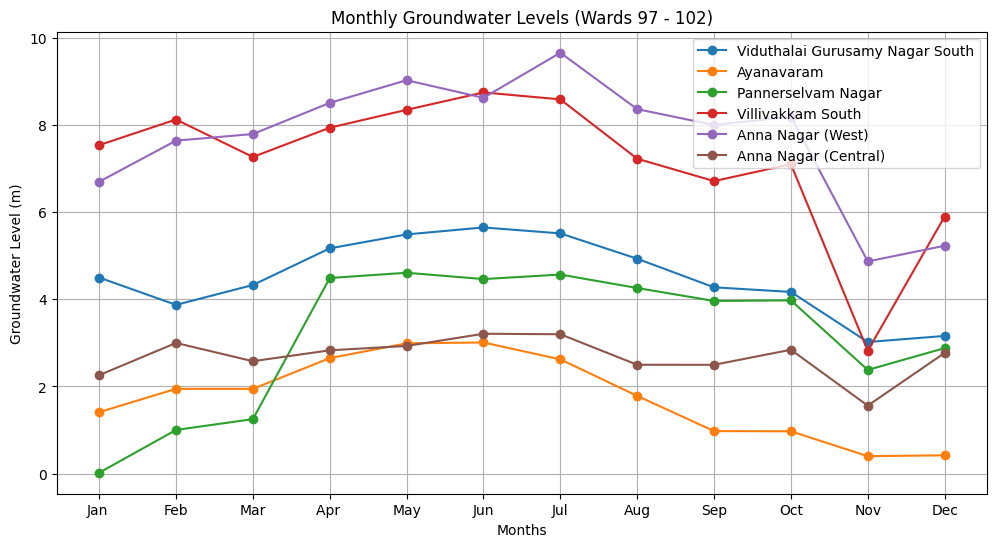

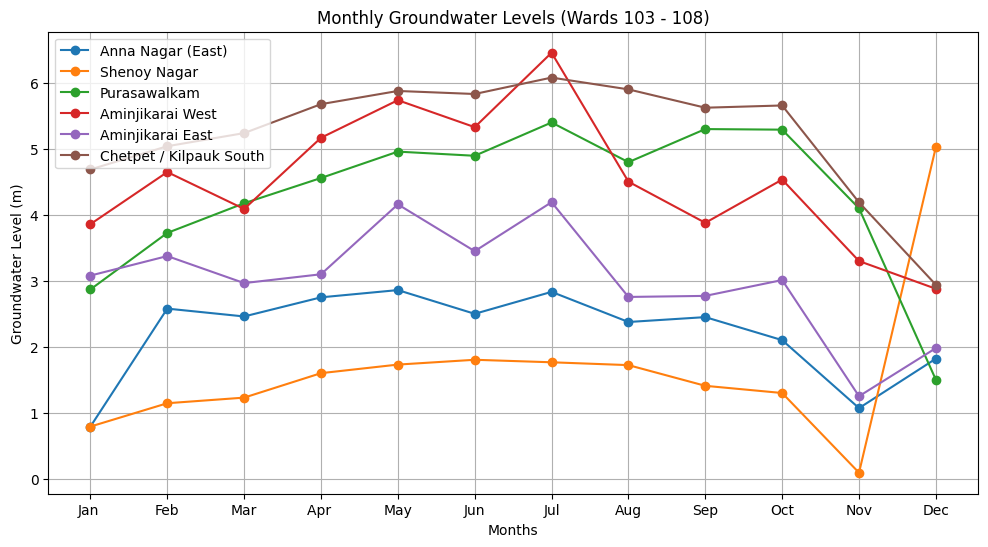

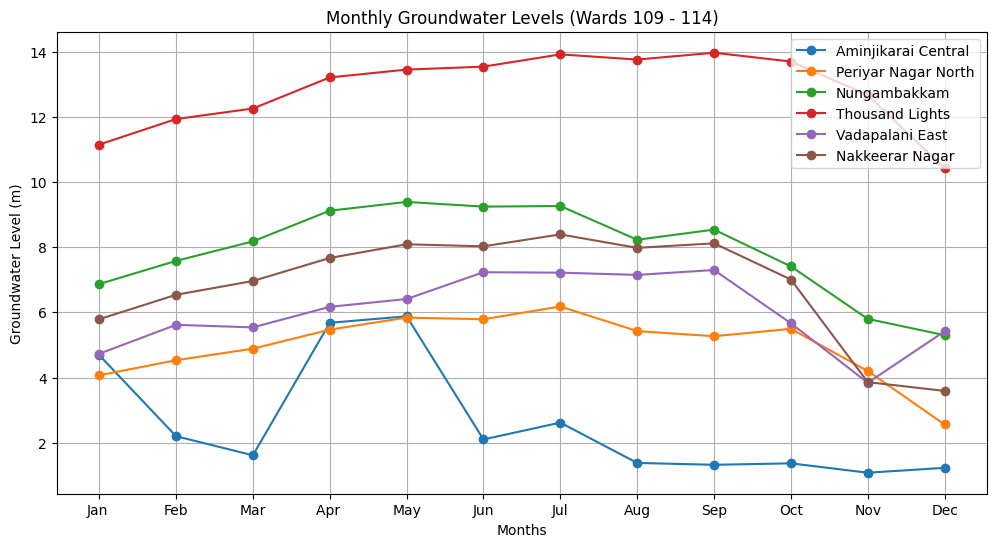

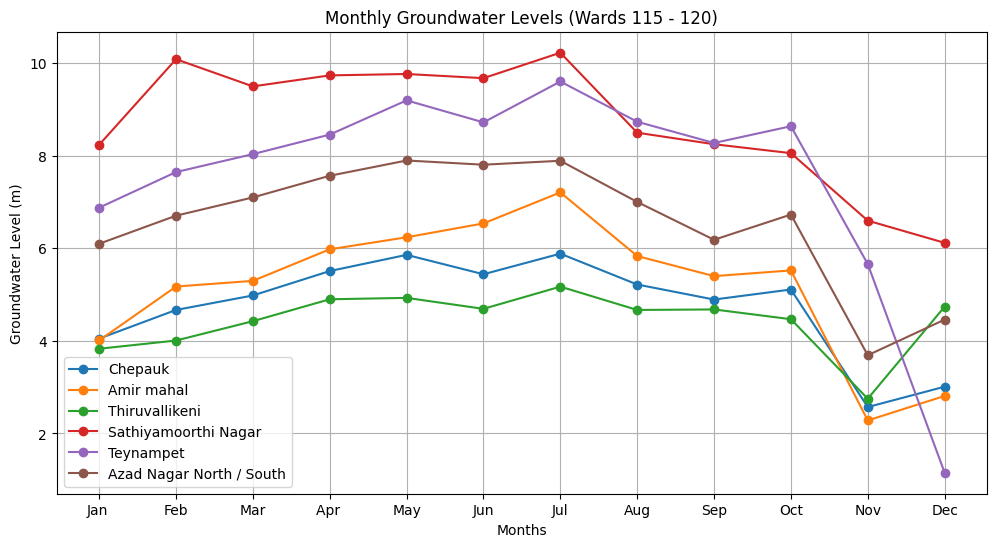

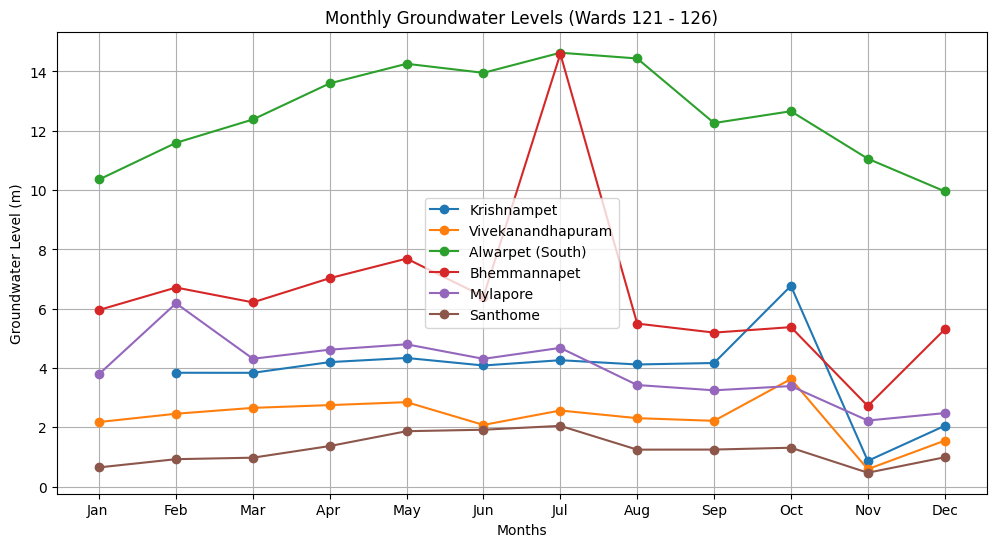

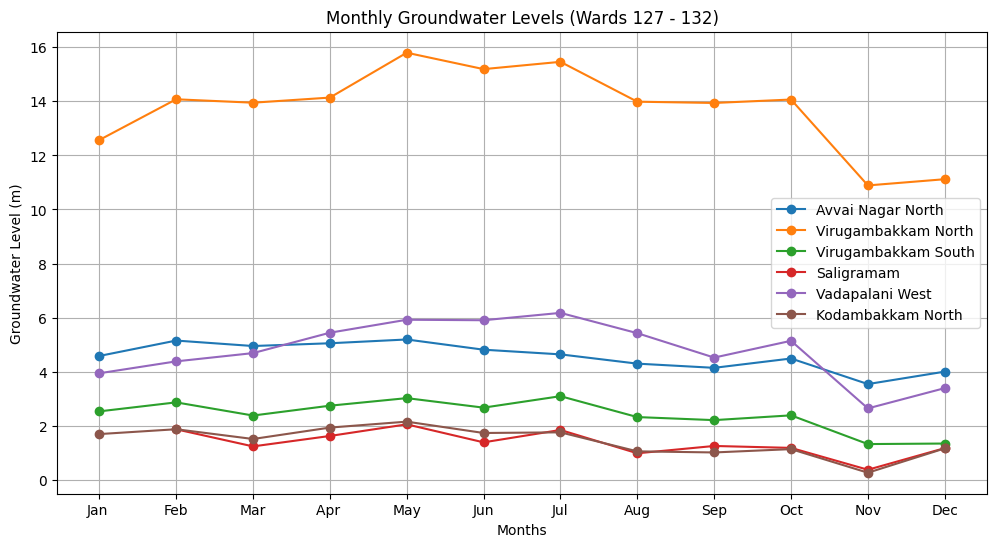

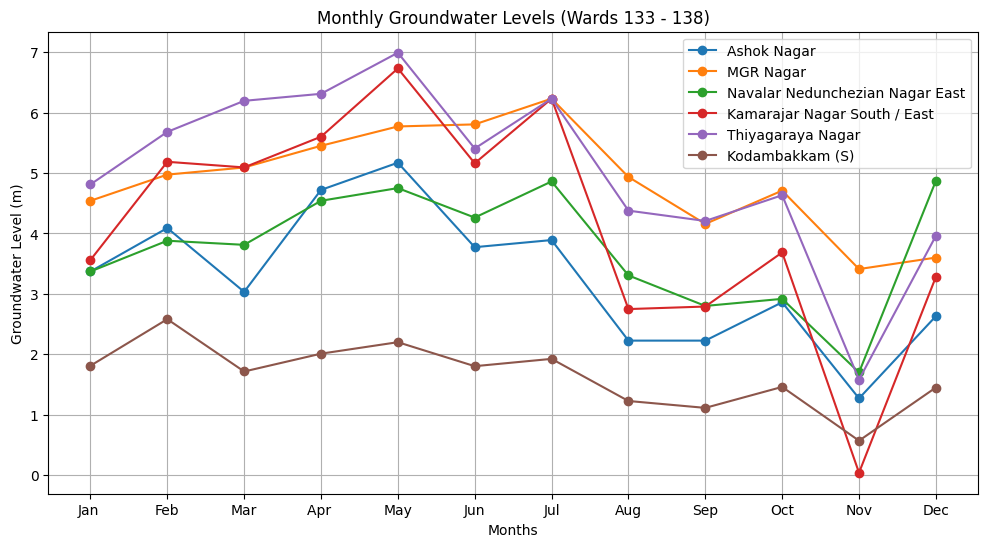

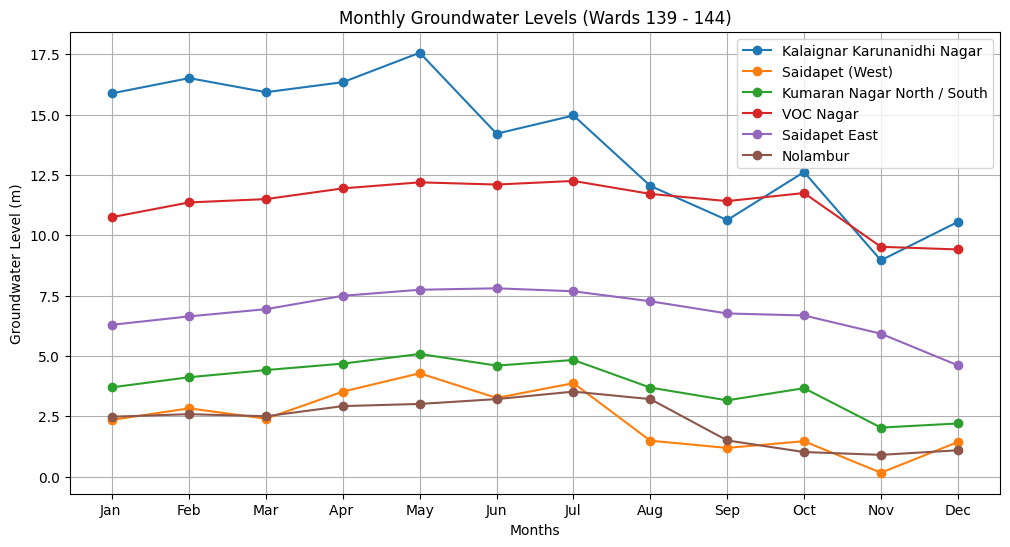

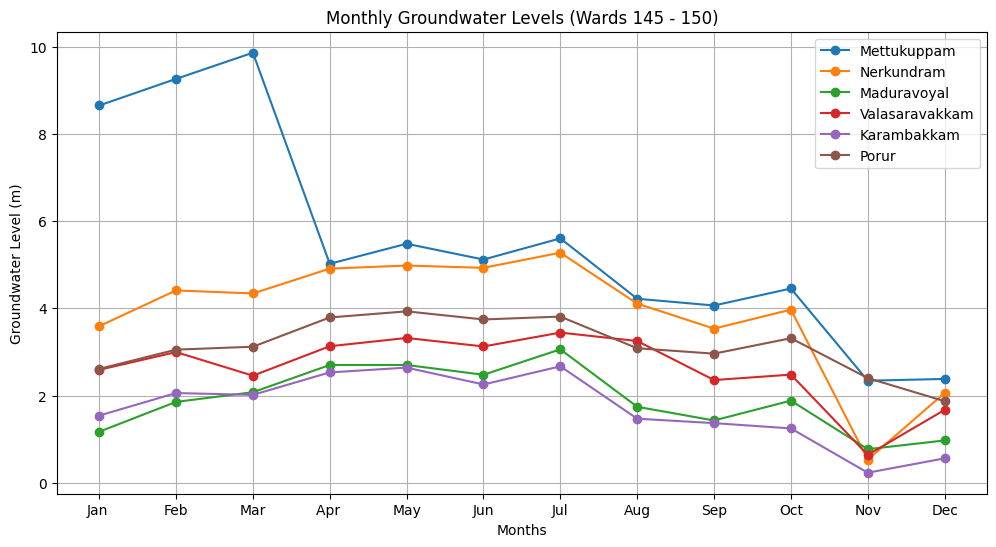

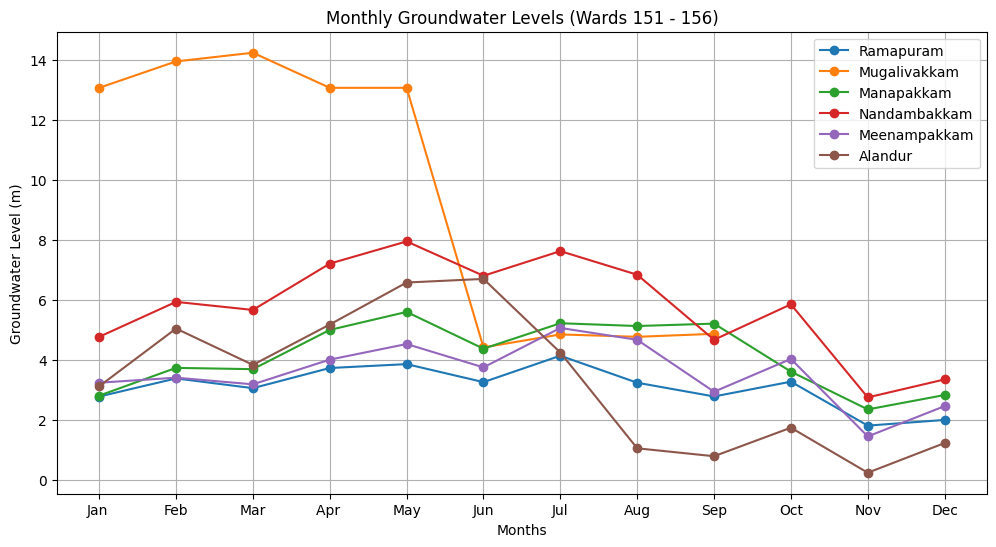

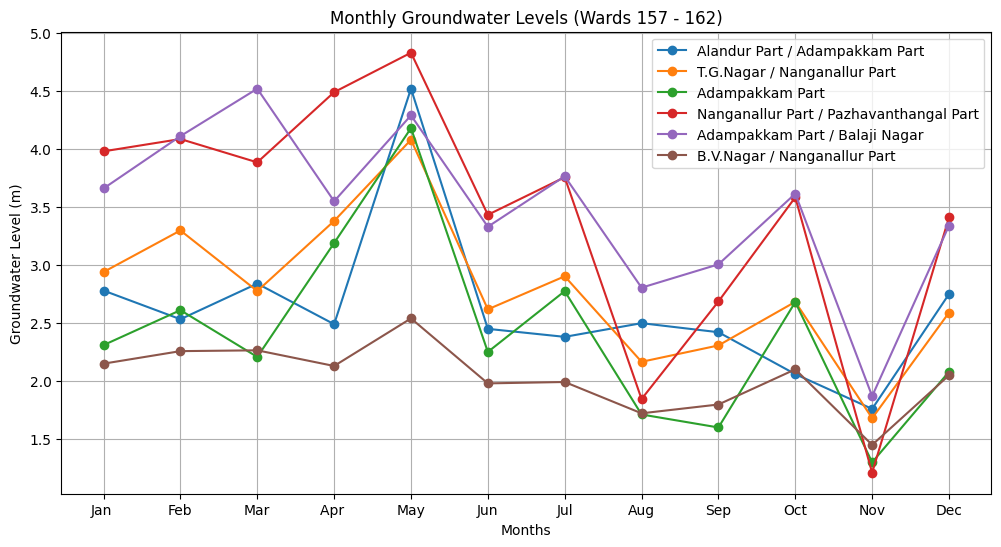

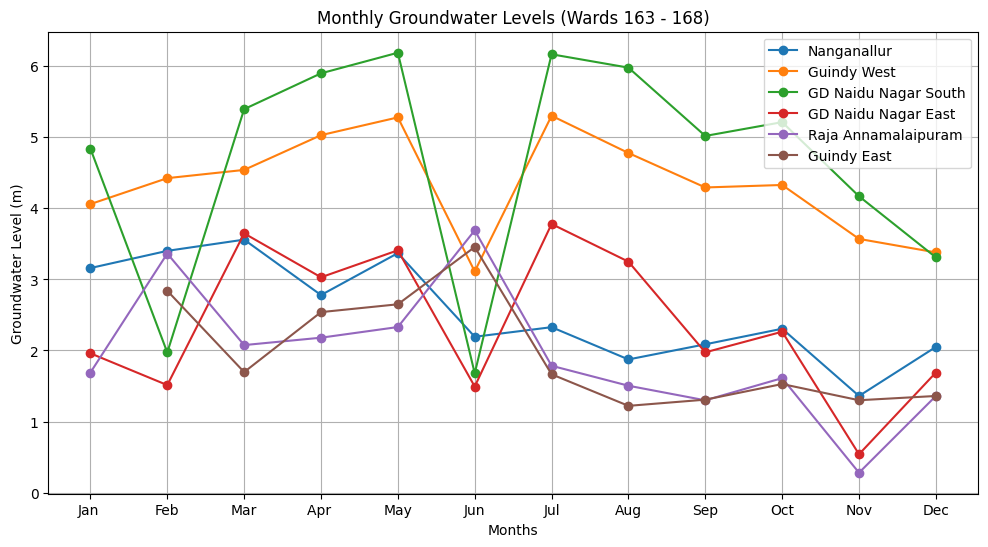

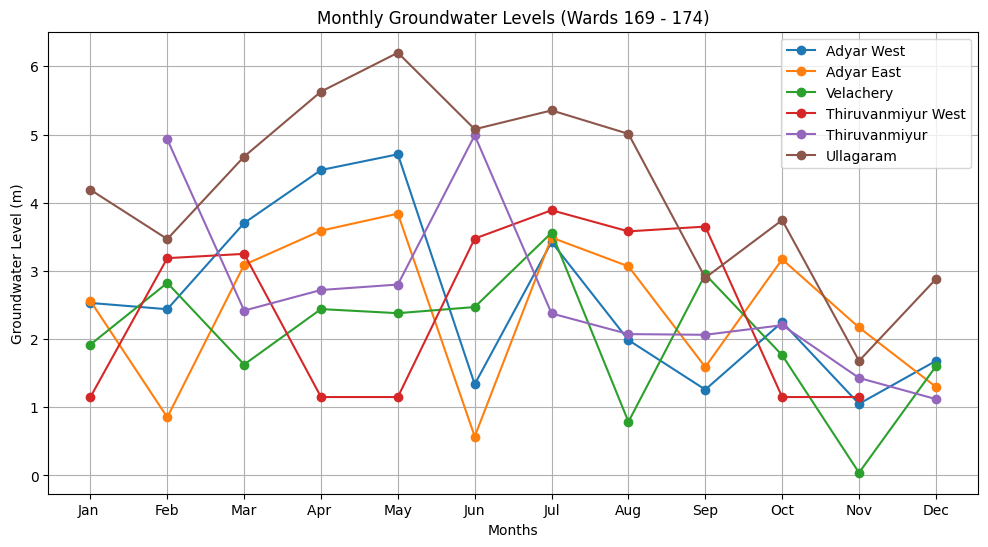

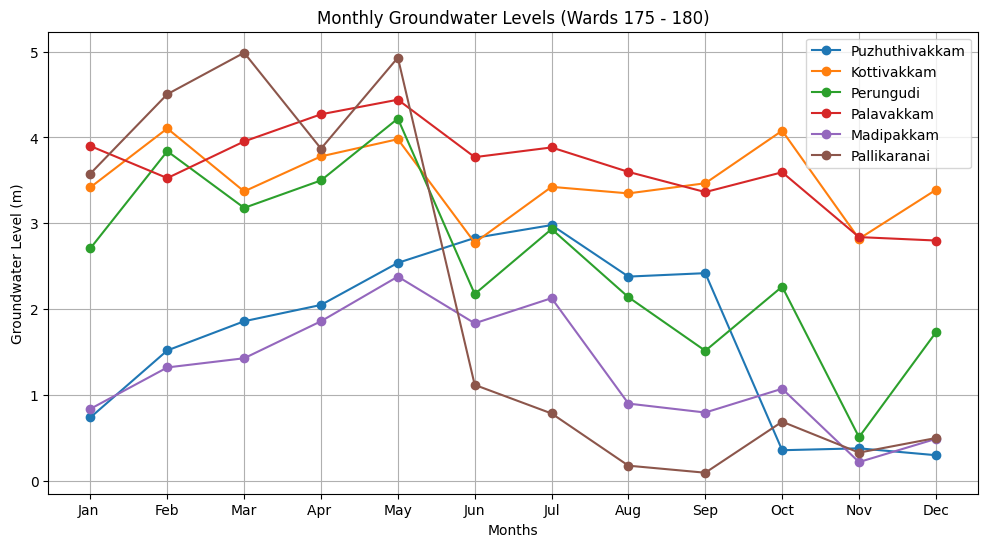

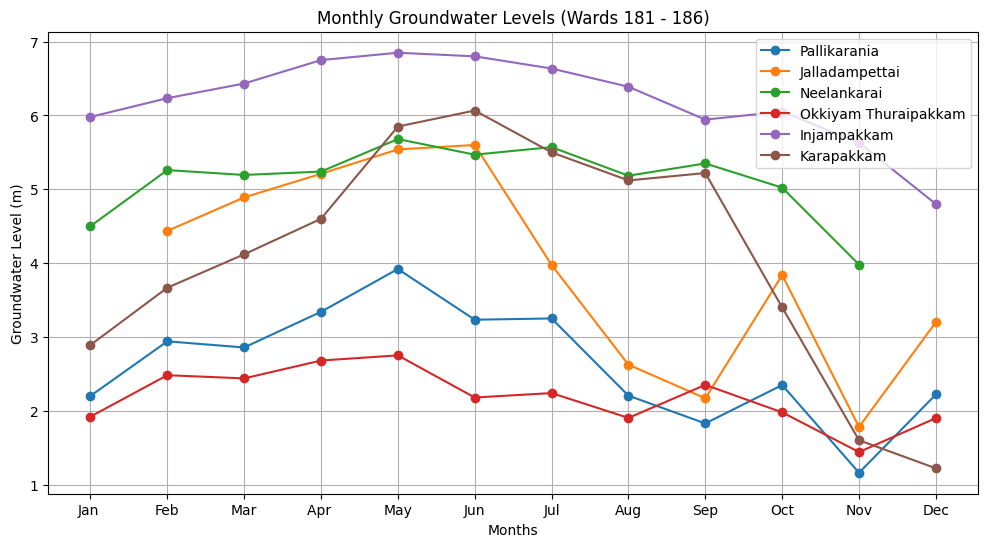

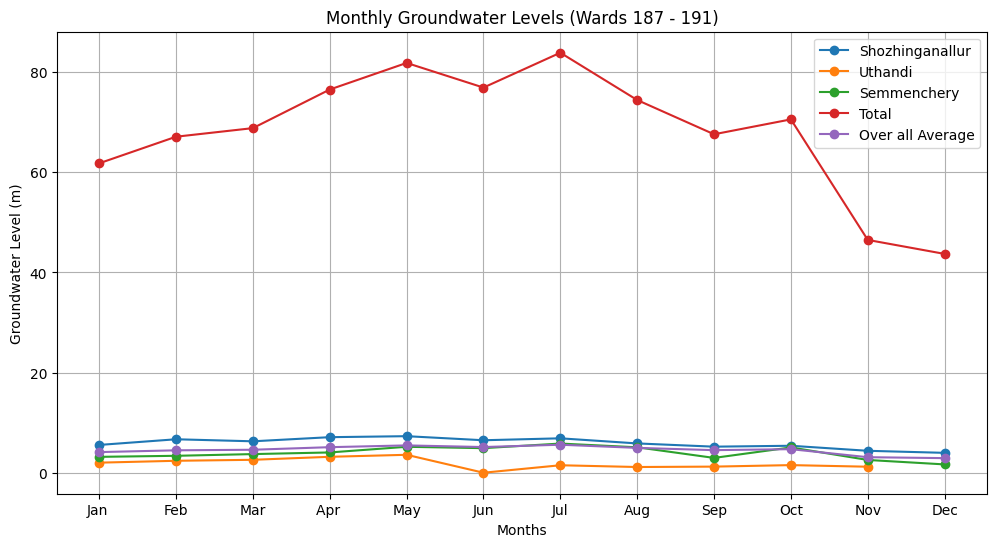

In [18]:
# Generate plots
for i in range(num_plots):
    plt.figure(figsize=(12, 6))
    
    start_idx = i * 6
    end_idx = start_idx + 6
    for location in locations[start_idx:end_idx]:  # Select 6 locations for each plot
        subset = df_filtered[df_filtered["Location"] == location]
        plt.plot(months, subset.iloc[0, 1:13].values, marker='o', label=location)

    plt.xlabel("Months")
    plt.ylabel("Groundwater Level (m)")
    plt.title(f"Monthly Groundwater Levels (Wards {start_idx + 1} - {min(end_idx, len(locations))})")
    plt.legend()
    plt.grid()
    plt.show()